## Great table contest

The data is from allrecepies.com as given in the TidyTuesday dataset of [September  16, 2025](https://github.com/rfordatascience/tidytuesday/blob/main/data/2025/2025-09-16/readme.md).

In [1]:
import pandas as pd
import numpy as np
import flagpy as fp
from great_tables import GT, style,loc, md, html, nanoplot_options
import io
import base64
import matplotlib.pyplot as plt

In [2]:
all_recipes = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-09-16/all_recipes.csv')
cuisines = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-09-16/cuisines.csv')

In [3]:
all_recipes

,name,url,author,date_published,ingredients,calories,fat,carbs,protein,avg_rating,total_ratings,reviews,prep_time,cook_time,total_time,servings
0,Chewy Whole Wheat Peanut Butter Brownies,https://www.allrecipes.com/recipe/140717/chewy...,DMOMMY,2020-06-18,"⅓ cup margarine, softened, ⅔ cup white sugar, ...",222.0,13.0,24.0,6.0,4.4,47.0,36.0,20,35,55,16.0
1,Pumpkin Pie Eggnog,https://www.allrecipes.com/recipe/269204/pumpk...,Bobbie Susan,2022-09-26,"12 egg yolks, 2 cups heavy whipping cream, ½ ...",477.0,31.0,43.0,8.0,5.0,1.0,1.0,10,5,495,8.0
2,Eggs Poached in Tomato Sauce,https://www.allrecipes.com/recipe/238054/eggs-...,Bren,2018-06-08,"2 tablespoons olive oil, or to taste, ½ onion...",354.0,18.0,32.0,20.0,4.8,4.0,4.0,10,75,85,4.0
3,Minestrone Casserole,https://www.allrecipes.com/minestrone-casserol...,Sarah Brekke,2025-03-03,4 cups dried mafalda pasta (mini lasagna noodl...,356.0,9.0,53.0,19.0,4.3,14.0,13.0,20,40,60,8.0
4,Yummy Stuffed Peppers,https://www.allrecipes.com/recipe/241937/yummy...,Procrastigirl,2024-12-11,"4 green bell peppers, halved lengthwise and se...",366.0,22.0,23.0,19.0,4.7,84.0,67.0,30,95,125,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14421,Cheesy Kale Quiche,https://www.allrecipes.com/recipe/244249/chees...,ally-gator,2022-01-14,"1 (9 inch) pie crust pastry, ½ (8 ounce) packa...",338.0,25.0,15.0,14.0,4.8,20.0,17.0,10,45,55,8.0
14422,Fabulous Chicken Cordon Bleu Casserole,https://www.allrecipes.com/fabulous-chicken-co...,Lindsay Breeze,2024-01-08,"8 ounces egg noodles, 1/2 cup butter, 1/2 cup ...",572.0,37.0,28.0,30.0,4.9,14.0,14.0,30,40,70,6.0
14423,"Absolutely Wonderful Cheesy, Creamy Spinach Ar...",https://www.allrecipes.com/recipe/262412/absol...,Shamrock Farms,2022-01-14,"½ cup Shamrock Farms® Premium Sour Cream, ½ cu...",244.0,13.0,22.0,11.0,NaN,NaN,NaN,10,25,35,8.0
14424,Gluten-Free Fruitcake,https://www.allrecipes.com/recipe/268501/glute...,Buckwheat Queen,2023-01-22,"¼ cup raisins, ¼ cup golden raisins, ¼ cup dri...",401.0,20.0,45.0,5.0,5.0,6.0,6.0,40,90,1585,12.0


In [4]:
cuisines

,name,country,url,author,date_published,ingredients,calories,fat,carbs,protein,avg_rating,total_ratings,reviews,prep_time,cook_time,total_time,servings
0,Saganaki (Flaming Greek Cheese),Greek,https://www.allrecipes.com/recipe/263750/flami...,John Mitzewich,2024-02-07,"1 (4 ounce) package kasseri cheese, 1 tablespo...",391.0,25.0,15.0,16.0,4.8,25.0,22.0,10,5,15,2.0
1,Coney Island Knishes,Jewish,https://www.allrecipes.com/recipe/272334/coney...,John Mitzewich,2024-11-26,"2 ¾ cups all-purpose flour, or more as needed,...",301.0,17.0,31.0,7.0,4.6,10.0,9.0,30,75,180,16.0
2,Diana's Hawaiian Bread Rolls,Australian and New Zealander,https://www.allrecipes.com/recipe/22797/dianas...,CHIPPENDALE,2022-07-14,1 ½ cups warm water (110 degrees F/45 degrees ...,64.0,3.0,9.0,1.0,4.3,126.0,104.0,20,15,180,12.0
3,Chilean Pebre,Chilean,https://www.allrecipes.com/recipe/273763/chile...,Heidi,2025-01-31,"½ cup chopped cilantro, ¼ cup olive oil, ¼ cup...",106.0,9.0,7.0,1.0,5.0,1.0,1.0,10,0,10,6.0
4,Tex-Mex Sheet Cake,Tex-Mex,https://www.allrecipes.com/recipe/22388/tex-me...,Ann,2025-02-18,"2 cups all-purpose flour, 1 ½ cups brown sugar...",449.0,23.0,58.0,7.0,3.8,13.0,11.0,30,15,45,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,Chicken Satay Bowls with Spicy Peanut Sauce,Thai,https://www.allrecipes.com/chicken-satay-bowls...,LaDonna Langwell,2025-06-02,"1/4 cup coconut milk, 1 tablespoon brown sugar...",716.0,42.0,41.0,48.0,5.0,3.0,3.0,30,15,165,4.0
2214,The Best Ricotta Pancakes,Canadian,https://www.allrecipes.com/recipe/242225/the-b...,WestCoastMom,2025-03-11,"1 cup ricotta cheese plus, 2 tablespoons ricot...",86.0,4.0,8.0,5.0,4.5,41.0,35.0,15,10,25,12.0
2215,Black Pepper Chicken,Chinese,https://www.allrecipes.com/black-pepper-chicke...,Barrett Heald,2024-03-05,"1/4 cup cornstarch, 1 tablespoon reduced-sodiu...",484.0,20.0,44.0,32.0,4.4,11.0,10.0,15,15,45,4.0
2216,Chicken Florentine,French,https://www.allrecipes.com/chicken-florentine-...,Renu Dhar,2024-01-18,"1/4 cup all-purpose flour, 3/4 teaspoon kosher...",571.0,33.0,12.0,50.0,4.8,17.0,17.0,15,20,35,4.0


Select cuisines that have five star rating *and* total cooking time less than 10 mins and more than zero (for some cuisines cooking time is not given).

In [5]:
cuisines_filtered = cuisines[(cuisines['avg_rating']==5) & (cuisines['total_time']<=10) & (cuisines['total_time']>0)]
cuisines_filtered

,name,country,url,author,date_published,ingredients,calories,fat,carbs,protein,avg_rating,total_ratings,reviews,prep_time,cook_time,total_time,servings
3,Chilean Pebre,Chilean,https://www.allrecipes.com/recipe/273763/chile...,Heidi,2025-01-31,"½ cup chopped cilantro, ¼ cup olive oil, ¼ cup...",106.0,9.0,7.0,1.0,5.0,1.0,1.0,10,0,10,6.0
9,Pan con Tomate (Spanish Tomato Bread),Spanish,https://www.allrecipes.com/pan-con-tomate-span...,Luis Luna,2025-06-02,"1 large tomato, chopped, 2 slices crusty bread...",322.0,16.0,39.0,7.0,5.0,2.0,2.0,5,5,10,1.0
243,Vietnamese Egg Coffee,Vietnamese,https://www.allrecipes.com/recipe/283318/vietn...,Yoly,2021-02-09,"1 large egg yolk, 2 tablespoons sweetened cond...",175.0,8.0,21.0,6.0,5.0,1.0,1.0,5,0,5,1.0
330,Spanish Gin and Tonic (Gin Tonica),Spanish,https://www.allrecipes.com/spanish-gin-and-ton...,John Mitzewich,2023-08-17,"whole spices, such as juniper berries, pink pe...",366.0,2.0,74.0,7.0,5.0,1.0,1.0,9,0,9,1.0
507,Homemade Za'atar,Lebanese,https://www.allrecipes.com/recipe/262666/homem...,Serena,2022-08-22,"3 tablespoons sesame seeds, 3 tablespoons fres...",29.0,2.0,2.0,1.0,5.0,3.0,2.0,5,3,8,6.0
824,Cuban Crunchwrap,Cuban,https://www.allrecipes.com/cuban-crunchwrap-re...,Nicole McLaughlin,2025-04-03,1 extra large flour tortilla (12 inches or lar...,2010.0,71.0,264.0,76.0,5.0,1.0,1.0,5,5,10,1.0
1061,Coconut Rum Brazilian Lemonade,Brazilian,https://www.allrecipes.com/coconut-rum-brazili...,Nicole McLaughlin,2024-06-13,"2 limes, 2 cups water, 1/2 cup coconut rum, 1/...",169.0,2.0,28.0,2.0,5.0,2.0,2.0,5,0,5,3.0
1216,Italian Cherry Margarita,Italian,https://www.allrecipes.com/italian-cherry-marg...,Nicole McLaughlin,2025-07-26,"2 fresh cherries, pitted, or more to taste, pl...",222.0,0.0,16.0,0.0,5.0,1.0,1.0,5,0,5,1.0
1226,Indian Summer Raspberry Peach Sangria,Spanish,https://www.allrecipes.com/recipe/233339/india...,Robert Farabaugh,2025-07-24,"1 (750 milliliter) bottle red wine, 24 fluid o...",175.0,0.0,22.0,1.0,5.0,8.0,4.0,10,0,10,8.0
1516,Chocolate Santafereño (Colombian-Style Hot Cho...,Colombian,https://www.allrecipes.com/chocolate-santafere...,Devon O'Brien,2024-10-07,"1 cup whole milk, 2 ounces bittersweet or dark...",544.0,32.0,47.0,17.0,5.0,1.0,1.0,5,5,10,1.0


In [6]:
cuisines_filtered.columns

Index(['name', 'country', 'url', 'author', 'date_published', 'ingredients',
       'calories', 'fat', 'carbs', 'protein', 'avg_rating', 'total_ratings',
       'reviews', 'prep_time', 'cook_time', 'total_time', 'servings'],
      dtype='object')

In [7]:
cuisines_final = cuisines_filtered[['name', 'country', 'ingredients',
       'calories', 'fat', 'carbs', 'protein', 
       'prep_time', 'cook_time']].sort_values(by='country').reset_index(drop=True)
cuisines_final

,name,country,ingredients,calories,fat,carbs,protein,prep_time,cook_time
0,Authentic Chimichurri,Argentinian,"1 cup fresh parsley, ½ cup extra-virgin olive ...",133.0,14.0,1.0,0.0,10,0
1,Coconut Rum Brazilian Lemonade,Brazilian,"2 limes, 2 cups water, 1/2 cup coconut rum, 1/...",169.0,2.0,28.0,2.0,5,0
2,Dave Matthews,Canadian,"1 fluid ounce coconut-flavored rum, 1 fluid ou...",NaN,NaN,NaN,NaN,5,0
3,Chilean Pebre,Chilean,"½ cup chopped cilantro, ¼ cup olive oil, ¼ cup...",106.0,9.0,7.0,1.0,10,0
4,Chocolate Santafereño (Colombian-Style Hot Cho...,Colombian,"1 cup whole milk, 2 ounces bittersweet or dark...",544.0,32.0,47.0,17.0,5,5
5,Cuban Crunchwrap,Cuban,1 extra large flour tortilla (12 inches or lar...,2010.0,71.0,264.0,76.0,5,5
6,Easy Mojitos,Cuban,"12 leaves mint, 2 lime slices, 1 teaspoon whi...",121.0,0.0,7.0,0.0,5,0
7,Italian Cherry Margarita,Italian,"2 fresh cherries, pitted, or more to taste, pl...",222.0,0.0,16.0,0.0,5,0
8,Homemade Za'atar,Lebanese,"3 tablespoons sesame seeds, 3 tablespoons fres...",29.0,2.0,2.0,1.0,5,3
9,Lebanese 7 Spices,Lebanese,"1 tablespoon ground nutmeg, 1 tablespoon groun...",15.0,1.0,3.0,1.0,5,0


In [8]:
# merge calories, fat, carbs, and protein cols into one col as a list of four elements.
cuisines_final['nutrition'] = cuisines_final[['fat', 'carbs', 'protein']].values.tolist()
# in calories, fat, protein, carbs, replace nan with 0.0
cuisines_final[['calories', 'fat', 'carbs', 'protein']] = cuisines_final[['calories', 'fat', 'carbs', 'protein']].fillna(0.0)
# convert nutrition col to string
cuisines_final['nutrition'] = cuisines_final['nutrition'].apply(
    lambda x: ', '.join([str(0.0 if pd.isna(i) else i) for i in x])
)
cuisines_final

,name,country,ingredients,calories,fat,carbs,protein,prep_time,cook_time,nutrition
0,Authentic Chimichurri,Argentinian,"1 cup fresh parsley, ½ cup extra-virgin olive ...",133.0,14.0,1.0,0.0,10,0,"14.0, 1.0, 0.0"
1,Coconut Rum Brazilian Lemonade,Brazilian,"2 limes, 2 cups water, 1/2 cup coconut rum, 1/...",169.0,2.0,28.0,2.0,5,0,"2.0, 28.0, 2.0"
2,Dave Matthews,Canadian,"1 fluid ounce coconut-flavored rum, 1 fluid ou...",0.0,0.0,0.0,0.0,5,0,"0.0, 0.0, 0.0"
3,Chilean Pebre,Chilean,"½ cup chopped cilantro, ¼ cup olive oil, ¼ cup...",106.0,9.0,7.0,1.0,10,0,"9.0, 7.0, 1.0"
4,Chocolate Santafereño (Colombian-Style Hot Cho...,Colombian,"1 cup whole milk, 2 ounces bittersweet or dark...",544.0,32.0,47.0,17.0,5,5,"32.0, 47.0, 17.0"
5,Cuban Crunchwrap,Cuban,1 extra large flour tortilla (12 inches or lar...,2010.0,71.0,264.0,76.0,5,5,"71.0, 264.0, 76.0"
6,Easy Mojitos,Cuban,"12 leaves mint, 2 lime slices, 1 teaspoon whi...",121.0,0.0,7.0,0.0,5,0,"0.0, 7.0, 0.0"
7,Italian Cherry Margarita,Italian,"2 fresh cherries, pitted, or more to taste, pl...",222.0,0.0,16.0,0.0,5,0,"0.0, 16.0, 0.0"
8,Homemade Za'atar,Lebanese,"3 tablespoons sesame seeds, 3 tablespoons fres...",29.0,2.0,2.0,1.0,5,3,"2.0, 2.0, 1.0"
9,Lebanese 7 Spices,Lebanese,"1 tablespoon ground nutmeg, 1 tablespoon groun...",15.0,1.0,3.0,1.0,5,0,"1.0, 3.0, 1.0"


In [9]:
cuisines_final['country'].unique()

array(['Argentinian', 'Brazilian', 'Canadian', 'Chilean', 'Colombian',
       'Cuban', 'Italian', 'Lebanese', 'Spanish', 'Vietnamese'],
      dtype=object)

In [10]:
country_list = ['Argentina', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Cuba', 'Italy', 'Lebanon', 'Spain', 'Vietnam']

In [11]:
# save flag for each country
for country in country_list:
    img = fp.get_flag_img(country)
    img.save(f'flags/{country}_flag.png')

In [12]:
country_image_paths = {
    'Argentinian': 'Argentina_flag.png',
    'Brazilian': 'Brazil_flag.png',
    'Canadian': 'Canada_flag.png',
    'Chilean': 'Chile_flag.png',
    'Colombian': 'Colombia_flag.png',
    'Cuban': 'Cuba_flag.png',
    'Italian': 'Italy_flag.png',
    'Lebanese': 'Lebanon_flag.png',
    'Spanish': 'Spain_flag.png',
    'Vietnamese': 'Vietnam_flag.png'
}
#country_image_paths = {k: "flags/"+v for k,v in country_image_paths.items()}
cuisines_final['flag']=cuisines_final['country'].map(country_image_paths)

In [13]:
cuisines_final.columns

Index(['name', 'country', 'ingredients', 'calories', 'fat', 'carbs', 'protein',
       'prep_time', 'cook_time', 'nutrition', 'flag'],
      dtype='object')

Below is a function to generate tally marks for prep and cook times. 

In [14]:
def create_tally_image(n, color='black'):
    """Create tally mark image with diagonal going from bottom-left to top-right"""
    groups = n // 5
    remainder = n % 5
    
    # Calculate figure width based on number of marks
    # Each group takes 0.7 width (0.5 for marks + 0.2 space)
    # Each remainder takes 0.1 width
    total_width = max(1.0, 0.7 * groups + 0.1 * remainder + 0.2)
    
    fig, ax = plt.subplots(figsize=(total_width, 0.5))
    ax.set_xlim(0, total_width)
    ax.set_ylim(0, 1)
    ax.axis('off')
    
    x_start = 0.1
    for i in range(groups):
        # Four vertical bars
        for j in range(4):
            ax.plot([x_start + j*0.1, x_start + j*0.1], [0.2, 0.8], color=color, lw=2)
        
        # Diagonal from bottom-left to top-right
        ax.plot([x_start - 0.05, x_start + 0.35], [0.15, 0.85], color=color, lw=2)
        
        # Add space after group
        x_start += 0.7  # 0.5 for marks + 0.2 space
    
    # Draw remaining marks
    for j in range(remainder):
        ax.plot([x_start + j*0.1, x_start + j*0.1], [0.2, 0.8], color=color, lw=2)
    
    # Save to memory
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0.1, transparent=True)
    buf.seek(0)
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    plt.close(fig)
    
    return f'<img src="data:image/png;base64,{img_str}" style="height:30px">'

cuisines_final["prep_Tally"] = cuisines_final["prep_time"].apply(create_tally_image, args=('purple',))
cuisines_final["cook_Tally"] = cuisines_final["cook_time"].apply(create_tally_image, args=('dodgerblue',))


## Make a great table

GT(_tbl_data=                                                 name                flag  \
0                               Authentic Chimichurri  Argentina_flag.png   
1                      Coconut Rum Brazilian Lemonade     Brazil_flag.png   
2                                       Dave Matthews     Canada_flag.png   
3                                       Chilean Pebre      Chile_flag.png   
4   Chocolate Santafereño (Colombian-Style Hot Cho...   Colombia_flag.png   
5                                    Cuban Crunchwrap       Cuba_flag.png   
6                                        Easy Mojitos       Cuba_flag.png   
7                            Italian Cherry Margarita      Italy_flag.png   
8                                    Homemade Za'atar    Lebanon_flag.png   
9                                   Lebanese 7 Spices    Lebanon_flag.png   
10              Pan con Tomate (Spanish Tomato Bread)      Spain_flag.png   
11                 Spanish Gin and Tonic (Gin Tonica)      Spain_flag.png   
12              Indian Summer Raspberry Peach Sangria      Spain_flag.png   
13                              Vietnamese Egg Coffee    Vietnam_flag.png   

                                          ingredients  \
0   1 cup fresh parsley, ½ cup extra-virgin olive ...   
1   2 limes, 2 cups water, 1/2 cup coconut rum, 1/...   
2   1 fluid ounce coconut-flavored rum, 1 fluid ou...   
3   ½ cup chopped cilantro, ¼ cup olive oil, ¼ cup...   
4   1 cup whole milk, 2 ounces bittersweet or dark...   
5   1 extra large flour tortilla (12 inches or lar...   
6   12 leaves mint, 2  lime slices, 1 teaspoon whi...   
7   2 fresh cherries, pitted, or more to taste, pl...   
8   3 tablespoons sesame seeds, 3 tablespoons fres...   
9   1 tablespoon ground nutmeg, 1 tablespoon groun...   
10  1 large tomato, chopped, 2 slices crusty bread...   
11  whole spices, such as juniper berries, pink pe...   
12  1 (750 milliliter) bottle red wine, 24 fluid o...   
13  1 large egg yolk, 2 tablespoons sweetened cond...   

                                           prep_Tally  \
0   <img src="data:image/png;base64,iVBORw0KGgoAAA...   
1   <img src="data:image/png;base64,iVBORw0KGgoAAA...   
2   <img src="data:image/png;base64,iVBORw0KGgoAAA...   
3   <img src="data:image/png;base64,iVBORw0KGgoAAA...   
4   <img src="data:image/png;base64,iVBORw0KGgoAAA...   
5   <img src="data:image/png;base64,iVBORw0KGgoAAA...   
6   <img src="data:image/png;base64,iVBORw0KGgoAAA...   
7   <img src="data:image/png;base64,iVBORw0KGgoAAA...   
8   <img src="data:image/png;base64,iVBORw0KGgoAAA...   
9   <img src="data:image/png;base64,iVBORw0KGgoAAA...   
10  <img src="data:image/png;base64,iVBORw0KGgoAAA...   
11  <img src="data:image/png;base64,iVBORw0KGgoAAA...   
12  <img src="data:image/png;base64,iVBORw0KGgoAAA...   
13  <img src="data:image/png;base64,iVBORw0KGgoAAA...   

                                           cook_Tally          nutrition  \
0   <img src="data:image/png;base64,iVBORw0KGgoAAA...     14.0, 1.0, 0.0   
1   <img src="data:image/png;base64,iVBORw0KGgoAAA...     2.0, 28.0, 2.0   
2   <img src="data:image/png;base64,iVBORw0KGgoAAA...      0.0, 0.0, 0.0   
3   <img src="data:image/png;base64,iVBORw0KGgoAAA...      9.0, 7.0, 1.0   
4   <img src="data:image/png;base64,iVBORw0KGgoAAA...   32.0, 47.0, 17.0   
5   <img src="data:image/png;base64,iVBORw0KGgoAAA...  71.0, 264.0, 76.0   
6   <img src="data:image/png;base64,iVBORw0KGgoAAA...      0.0, 7.0, 0.0   
7   <img src="data:image/png;base64,iVBORw0KGgoAAA...     0.0, 16.0, 0.0   
8   <img src="data:image/png;base64,iVBORw0KGgoAAA...      2.0, 2.0, 1.0   
9   <img src="data:image/png;base64,iVBORw0KGgoAAA...      1.0, 3.0, 1.0   
10  <img src="data:image/png;base64,iVBORw0KGgoAAA...    16.0, 39.0, 7.0   
11  <img src="data:image/png;base64,iVBORw0KGgoAAA...     2.0, 74.0, 7.0   
12  <img src="data:image/png;base64,iVBORw0KGgoAAA...     0.0, 22.0, 1.0   
13  <img src="data:image/png;base64,iVBORw0KGgoAAA...  
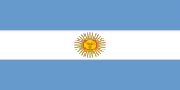
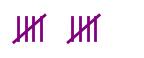
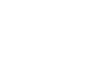
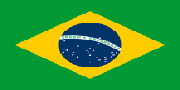
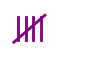
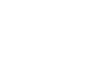
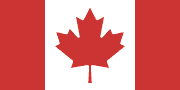
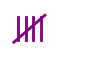
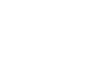
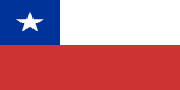
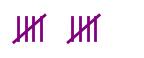
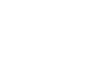
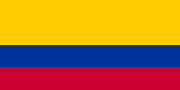
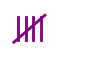
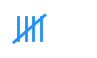
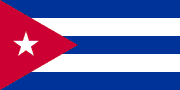
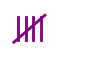
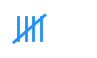
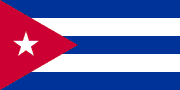
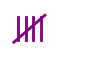
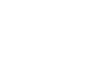
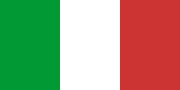
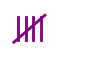
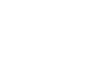
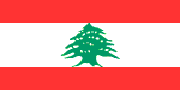
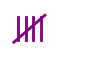
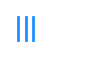
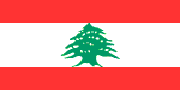
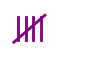
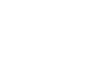
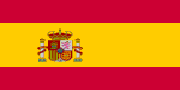
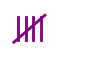
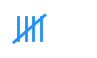
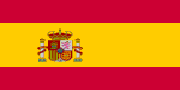
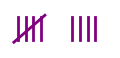
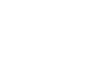
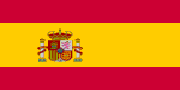
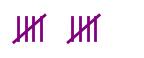
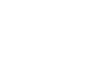
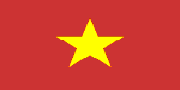
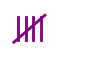
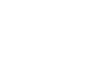

In [94]:
gt_table = (
GT(cuisines_final[['name', 'flag', 'ingredients', 'prep_Tally', 'cook_Tally', 'nutrition','calories']], rowname_col='name')
.cols_width({
      'name': '15%',
      'flag': '8%',
      'ingredients': '45%',
      'calories': '6%',
      'nutrition': '15%',
      'prep_Tally': '5%',
      'cook_Tally': '6%'
  })
.tab_spanner(label="Time (mins)", columns=["prep_Tally", "cook_Tally"])
.tab_spanner(label="Nutrition", columns=["calories","nutrition"])
.tab_style(
    style=[style.text(weight="bold")],
    locations=loc.spanner_labels(["Time (mins)", "Nutrition"])
)
.tab_style(
    style=[
        style.borders(sides="top", color="#FA7E0E", weight="20px")
    ],
    locations=loc.column_labels(columns=["Time (mins)", "Nutrition"])
)

.tab_header(
    title=md("#### **Five star** cuisines having preparation time upto **ten minutes**."),
)
.tab_options(
    heading_background_color="#FA7E0E",  # Set background color for the heading area
    table_border_top_width="0px",
    table_border_bottom_width="0px",
#    table_border_right_width="5px", 
#    table_border_right_color="#FA7E0E",
    heading_border_bottom_width="0px",   
    column_labels_border_top_width = "0px",
    column_labels_border_bottom_width = "2px",
    column_labels_border_bottom_color = "#FA7E0E",
    column_labels_background_color="#FCBC6C",
    table_body_border_top_width="3px", # hacky
    table_body_border_top_color="#FCBC6C", # hacky
    table_body_border_bottom_width="0px",
    source_notes_border_bottom_width="0px",
    source_notes_background_color="#FA7E0E",
    row_striping_background_color = "#FFFFFF",
    row_striping_include_table_body = True,
    table_width='100%',
    table_body_hlines_color = "#FCBC6C"
)
.cols_label(
    prep_Tally="Prep",
    cook_Tally="Cook",
    calories="Calories",
    flag="Country",
    ingredients="Ingredients",
    nutrition="Fat, Carbs, Protein"
)
.fmt_number(columns=["calories"], decimals=0)
.fmt_nanoplot(columns="nutrition", plot_type='bar',options=nanoplot_options(data_bar_fill_color="#FCBC6C",\
                                                                           data_bar_stroke_color="#FCBC6C"))
.fmt_markdown(columns='ingredients')
.cols_align('center')
.cols_align(align="left", columns=["ingredients"])
.tab_style(
    style=[style.text(align="center"),                
           ],
    locations=loc.column_labels(columns=["ingredients"])
    )
.tab_style(
    style=style.text(weight="bold"),                
    locations=loc.column_labels(columns=["flag","ingredients"])
    )
.data_color(
        columns=['calories'],
        palette='Reds',
        domain=[cuisines_final['calories'].min(), cuisines_final['calories'].max()]
        ) 
.tab_style(
style=[
        style.text(whitespace='normal'),  # Text wrapping
        style.fill(color='papayawhip')     # Background fill
    ],
locations=loc.body(columns='ingredients'))
.tab_style(
    style=[
        style.text(whitespace='normal', weight="bold", font="Lato"),
        style.fill(color='#FCBC6C'),
        style.css("border:0px")
    ],
    locations=loc.stub()
  )
.tab_style(
    style=style.text(color="purple"), #, weight="bold", size="16px"),
    locations=loc.column_labels(columns=["prep_Tally"])
)
.tab_style(
    style=style.text(color="dodgerblue"),
    locations=loc.column_labels(columns=["cook_Tally"])
)
.fmt_image(
    columns=['flag'], path="flags/"  
)
.tab_source_note(
    source_note="Data: allrecipies.com",
)
     
.tab_style(
    style=style.css("border:0px"),
    locations=loc.body(columns=["flag","nutrition"])
)
.tab_style(
    style=style.css("border-radius: 50px;"),
    locations=loc.body(columns=["calories"])
)


)

#gt_table.save("table.html")

# Save html without selenium
#html = gt_table.as_raw_html()
#with open("table.html", "w") as f:
#    f.write(html)

gt_table

gt_table.save(
    file="my_table.png",
    selector="table",       
    scale=1.0,               # Zoom level
    expand=0,                
    window_size=(1600, 800)  
)